In [2]:
# Imports
import random as r
import numpy as np
import math
import time
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import sys


In [3]:
# Define class HEAP
class Heap():
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []

    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t

    def minHeapify(self, idx):
        smallest = idx
        left = 2 * idx + 1
        right = 2 * idx + 2
        if left < self.size and self.array[left][1] < self.array[smallest][1]:
            smallest = left
        if right < self.size and self.array[right][1] < self.array[smallest][1]:
            smallest = right
        if smallest != idx:
            self.pos[self.array[smallest][0]] = idx
            self.pos[self.array[idx][0]] = smallest
            self.swapMinHeapNode(smallest, int(idx))
            self.minHeapify(int(smallest))

    def extractMin(self):
        if self.size == 0:
            return
        root = self.array[0]
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
        self.size -= 1
        self.minHeapify(0)
        return root

    def decreaseKey(self, v, dist):
        i = self.pos[v]
        self.array[i][1] = dist
        while i > 0 and self.array[i][1] < self.array[int((i - 1) / 2)][1]:
            self.pos[self.array[i][0]] = int((i - 1) / 2)
            self.pos[self.array[int((i - 1) / 2)][0]] = i
            self.swapMinHeapNode(i, int((i - 1) / 2))
            i = int((i - 1) / 2)

    def isInMinHeap(self, v):
        if self.pos[v] < self.size:
            return True
        return False


In [4]:
# Define class GRAPH
class Graph:
    def __init__(self, ver):
        self.v = ver
        self.g = [] #list of edges for Kruskal
        self.l = defaultdict(list) #adjacency list for Primas
        self.mstKruskal = [] #minimum spanning tree
        self.mstPrim = [] #minimum spanning tree

    def addEdge(self, i, j, w):
        if (i >= self.v) or (j >= self.v):
            print('Error with addition', i , j , self.v )
            return
        self.l[i].insert(0, [j, w])
        self.l[j].insert(0, [i, w])
        self.g.append([i,j,w])

    #uses path compression heuristic
    def findSet(self, sets, x):
        if sets[x] == x:
            return x
        return self.findSet(sets, sets[x])

    def unionTrees(self, sets, rank, x, y):
        xroot = self.findSet(sets, x)
        yroot = self.findSet(sets, y)
        if rank[xroot] < rank[yroot]:
            sets[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            sets[yroot] = xroot
        else:
            sets[yroot] = xroot
            rank[xroot] += 1

    def KruskalAlgorithm(self):
        sets = []
        rank = []
        for vertex in range(self.v):
            sets.append(vertex)
            rank.append(0)

        self.g = sorted(self.g, key= lambda w: w[2])
        e = 0
        i = 0
        self.mstKruskal.clear()
    
        #tree creation is finished when all vertices are connected with v-1 edges
        while e < self.v - 1:
            u, v, w = self.g[i]
            i += 1
            x = self.findSet(sets, u)
            y = self.findSet(sets, v)
            if x != y:
                e += 1
                self.mstKruskal.append([u, v, w])
                self.unionTrees(sets, rank, x, y)
        return self.mstKruskal

    def PrimsAlgorithm(self):
        V = self.v
        key = []
        parent = []
        minheap = Heap()
        for v in range(V):
            parent.append(-1)
            key.append(sys.maxsize)
            minheap.array.append([v, key[v]])
            minheap.pos.append(v)
        minheap.pos[0] = 0
        key[0] = 0
        minheap.decreaseKey(0, key[0])
        minheap.size = V
        while minheap.size != 0:
            newHeapNode = minheap.extractMin()
            u = newHeapNode[0]
            for p in self.l[u]:
                v = p[0]
                if minheap.isInMinHeap(v) and p[1] < key[v]:
                    key[v] = p[1]
                    parent[v] = u
                    minheap.decreaseKey(v, key[v])
        #creating of answer, not part of the algorithm
        self.mstPrim.clear()

        for i in range(1, V):
            for m in self.l[i]:
                if m[0] == parent[i]:
                    wei = m[1]
            self.mstPrim.append([parent[i], i, wei])
        return self.mstPrim


Verts:  10 Edges:  40
Verts:  11 Edges:  44
Verts:  12 Edges:  48
Verts:  13 Edges:  52
Verts:  14 Edges:  56
Verts:  15 Edges:  60
Verts:  16 Edges:  64
Verts:  17 Edges:  68
Verts:  18 Edges:  72
Verts:  19 Edges:  76
Verts:  20 Edges:  80
Verts:  21 Edges:  84
Verts:  22 Edges:  88
Verts:  23 Edges:  92
Verts:  24 Edges:  96
Verts:  25 Edges:  100
Verts:  26 Edges:  104
Verts:  27 Edges:  108
Verts:  28 Edges:  112
Verts:  29 Edges:  116
Verts:  30 Edges:  120
Verts:  31 Edges:  124
Verts:  32 Edges:  128
Verts:  33 Edges:  132
Verts:  34 Edges:  136
Verts:  35 Edges:  140
Verts:  36 Edges:  144
Verts:  37 Edges:  148
Verts:  38 Edges:  152
Verts:  39 Edges:  156
Verts:  40 Edges:  160
Verts:  41 Edges:  164
Verts:  42 Edges:  168
Verts:  43 Edges:  172
Verts:  44 Edges:  176
Verts:  45 Edges:  180
Verts:  46 Edges:  184
Verts:  47 Edges:  188
Verts:  48 Edges:  192
Verts:  49 Edges:  196
Verts:  50 Edges:  200
Verts:  51 Edges:  204
Verts:  52 Edges:  208
Verts:  53 Edges:  212
Ver

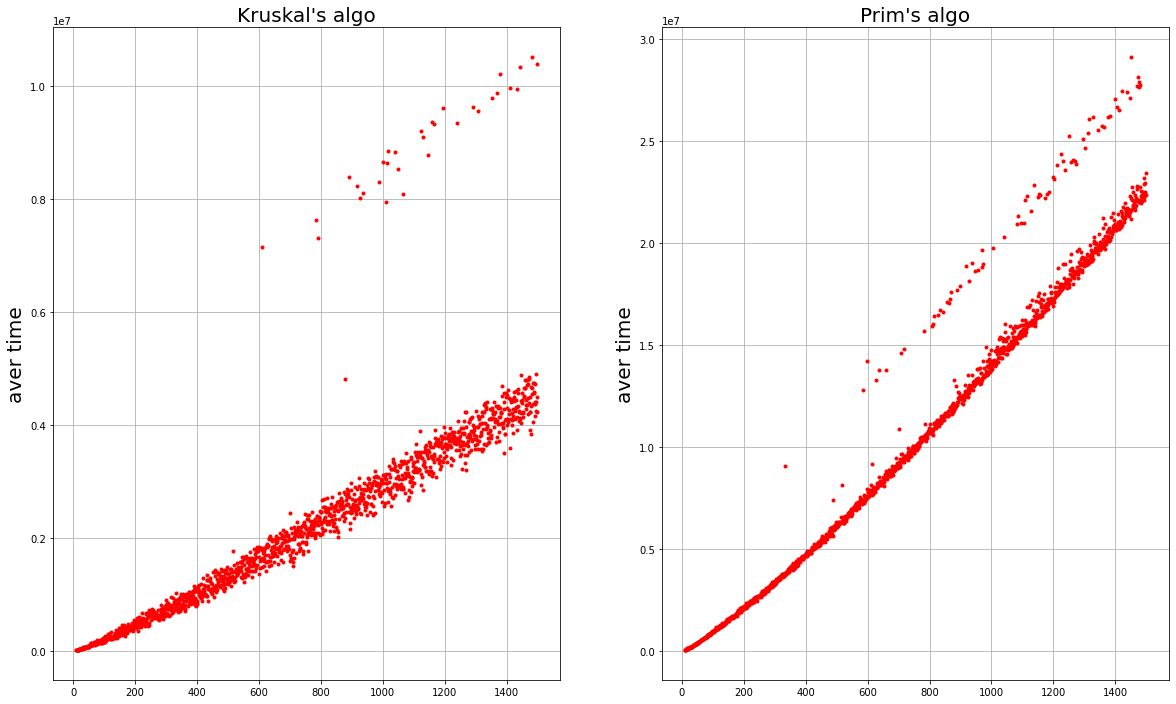

In [16]:
    # Proccess time complexity of graphs

    weight_max = 20
    vnum_list = []

    krusk_time = []
    prim_time = []

    for v_num in range(10, 1500):
        vnum_list.append(v_num)
        # Get edge number for vert number
        # e_num = int(v_num**2 * 0.2)
        e_num = v_num * 4
        print("Verts: ", v_num, "Edges: ", e_num)
        # Generate CONNECTED graph
        while True:
            g_mat = np.zeros((v_num, v_num))
            new_edges = 0
            while new_edges < e_num:
                i = r.randint(0, v_num - 1)
                j = r.randint(0, v_num - 1)
                if g_mat[i, j] == 0:
                    weight = r.randint(0, weight_max)
                    g_mat[i, j] = weight
                    g_mat[j, i] = weight
                    new_edges += 1

            G = nx.from_numpy_matrix(g_mat)
            if nx.is_connected(G) == True:
                break
        # print(g_mat)
        # Init our Graph class
        graph = Graph(v_num)
        # Add edges to our implemented class
        for edge in G.edges.data('weight'):
            graph.addEdge(*edge)


        timestamp_sum = 0
        for i in range(5):
            ts_1 = time.perf_counter_ns()
            krus_res = graph.KruskalAlgorithm()
            ts_2 = time.perf_counter_ns()
            timestamp_sum += ts_2 - ts_1
        krusk_time.append(timestamp_sum/5)

        timestamp_sum = 0
        for i in range(5):
            ts_1 = time.perf_counter_ns()
            prim_res = graph.PrimsAlgorithm()
            ts_2 = time.perf_counter_ns()
            timestamp_sum += ts_2 - ts_1
        prim_time.append(timestamp_sum/5)



# Print Time comlexity graphs

plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
# Print Gained data
plt.plot(vnum_list, krusk_time, "ro", markersize=3.)
plt.ylabel("aver time", fontsize=20) 
plt.title("Kruskal's algo", fontsize=20)
plt.grid(True)

plt.subplot(1, 2, 2)
# Print Gained data
plt.plot(vnum_list, prim_time, "ro", markersize=3.)
plt.ylabel("aver time", fontsize=20)
plt.title("Prim's algo", fontsize=20)
plt.grid(True)


In [6]:
# Define function for visualisatuing results
def visualisate_results(krus_res, prim_res, G):
    G_prim = G.copy()
    G_krus = G.copy()

    fig, axes = plt.subplots(1, 1, figsize=(20, 20))

    pos = nx.spring_layout(G, iterations=1000, seed=2)

    # Print base Graph
    nx.draw(G, pos, node_color='red', ax=axes, edge_color='grey', node_size=5)
    axes.set_title("Connected Graph", fontsize=25)

    fig, axes = plt.subplots(1, 1, figsize=(20, 20))

    for edge in G.edges.data('weight'):
        if not [*edge] in krus_res and not [edge[1], edge[0], edge[2]] in krus_res:
            # print(edge)
            G_krus.remove_edge(edge[0], edge[1]) # Removes both edges
    # Print Kruskal Graph
    nx.draw(G_krus, pos, ax=axes, node_color='red', edge_color="grey", node_size=6)
    axes.set_title("Kruskal Algorithm", fontsize=25)

    fig, axes = plt.subplots(1, 1, figsize=(20, 20))

    for edge in G.edges.data('weight'):
        if not [*edge] in prim_res and not [edge[1], edge[0], edge[2]] in prim_res:
            # print(edge)
            G_prim.remove_edge(edge[0], edge[1]) # Removes both edges
    # Print Prim Graph
    nx.draw(G_prim, pos, ax=axes, node_color='red', edge_color="grey", node_size=6)
    axes.set_title("Prim Algorithm", fontsize=25)


Kruskal Algorith MST edges number: 1498   total weight: 5244.0
Prims Algorith MST edges number: 1498   total weight: 5244.0


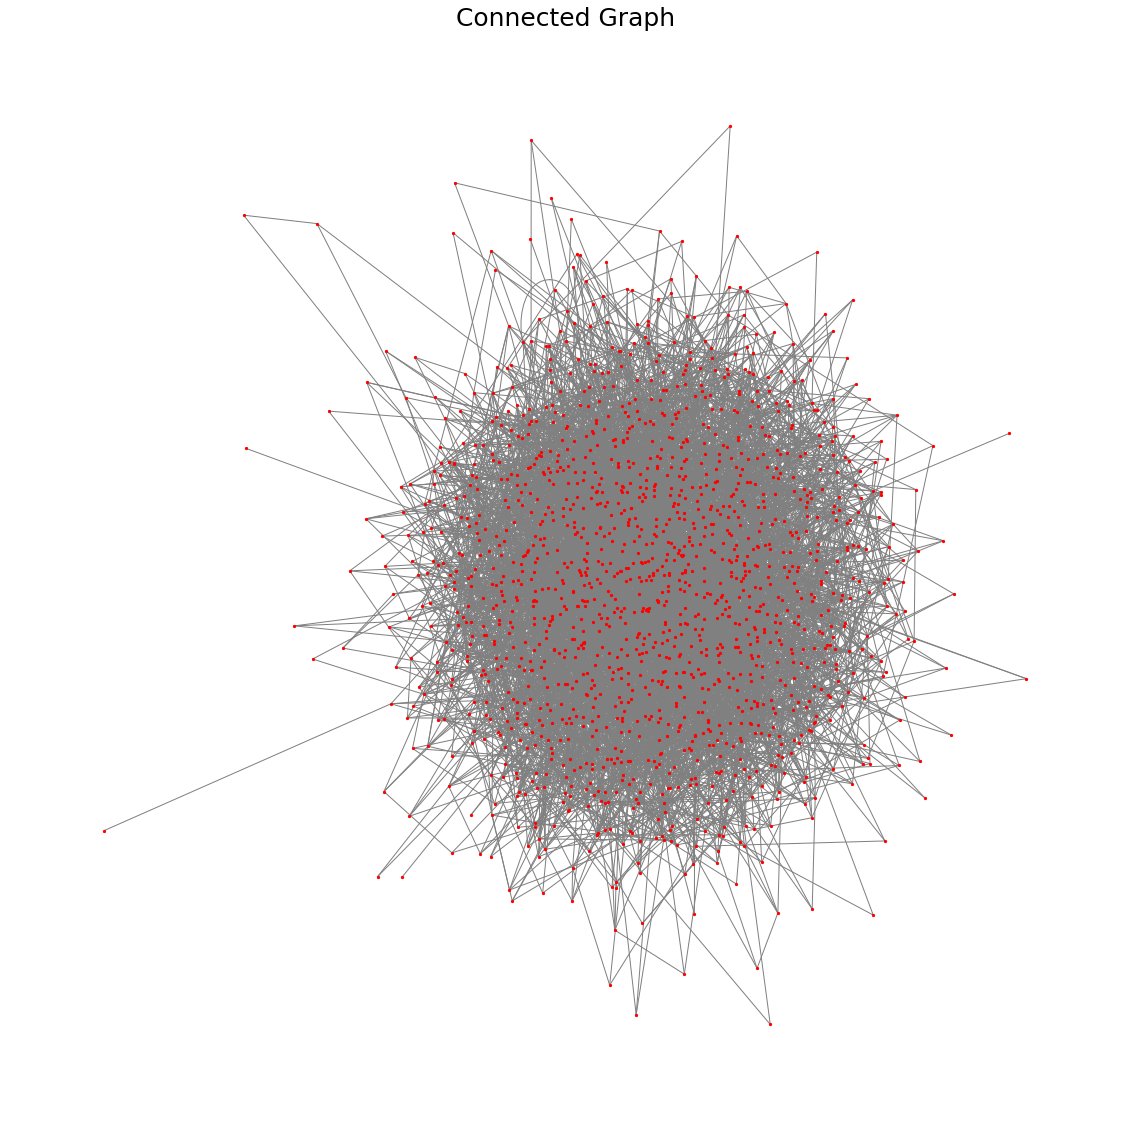

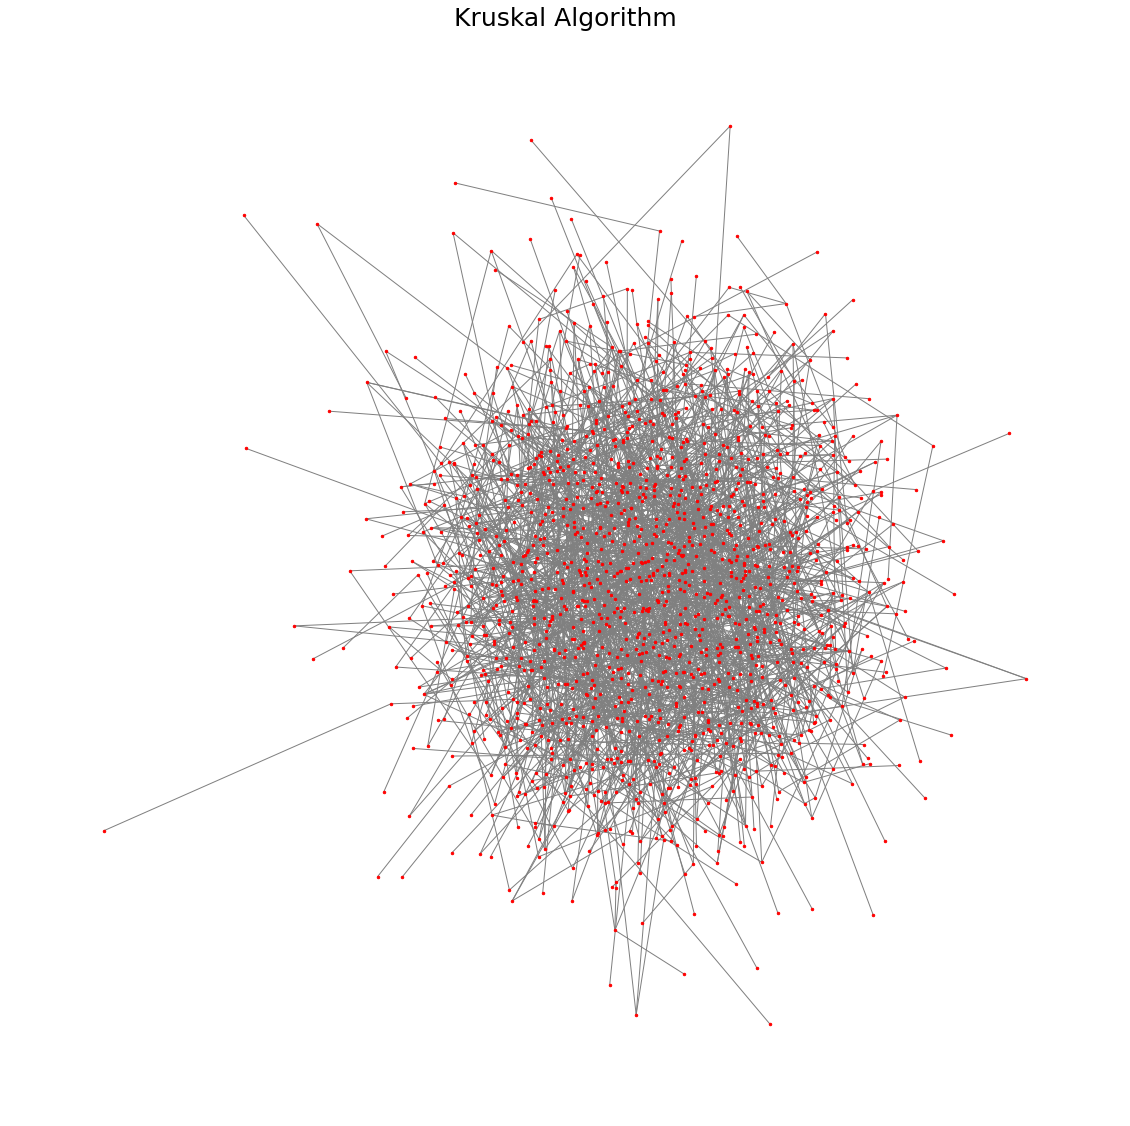

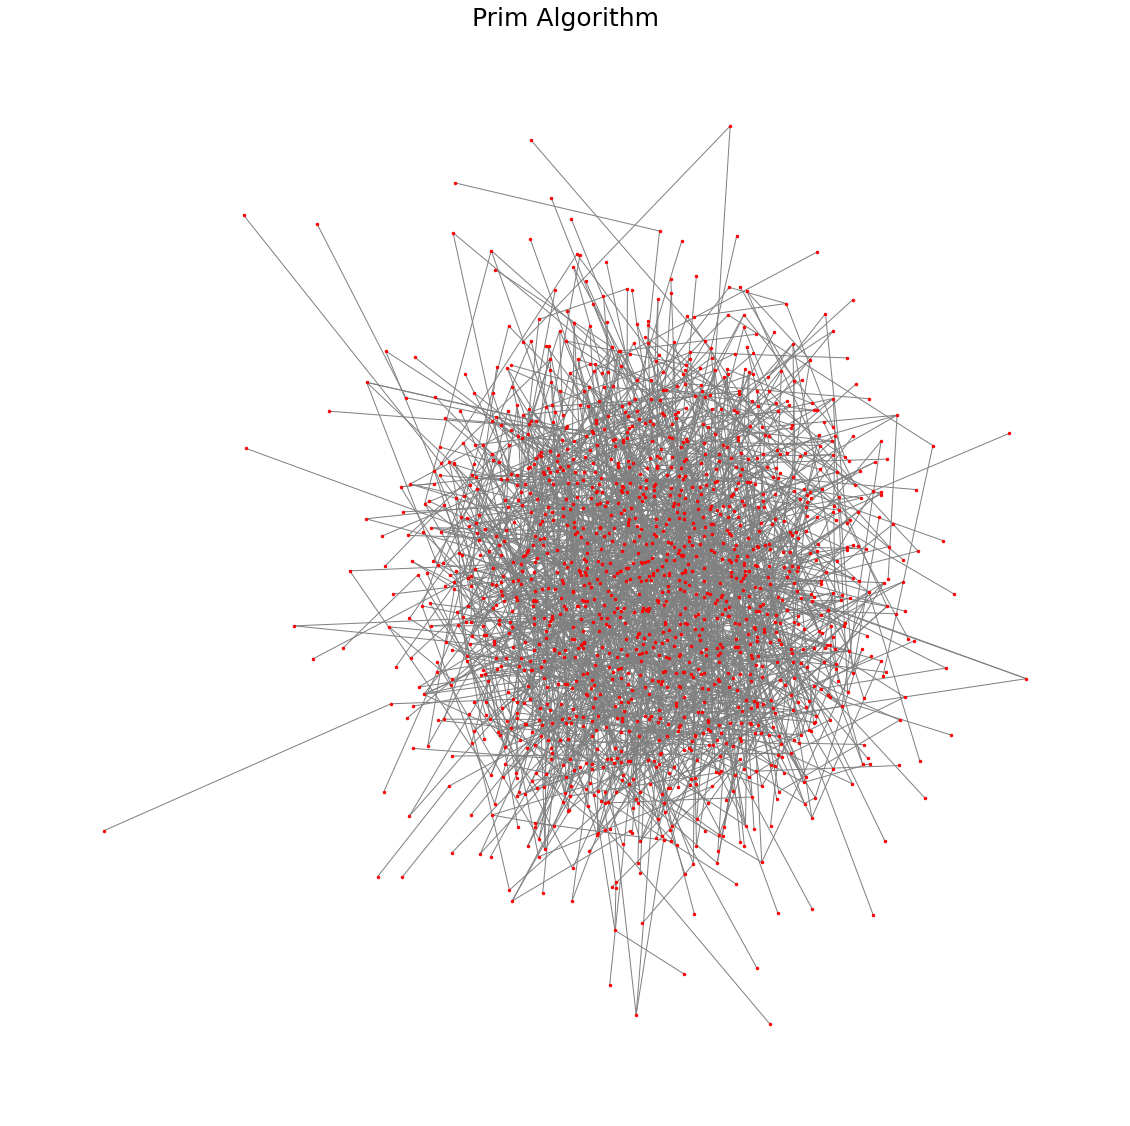

In [7]:
# Visualisate results for last iteration (1000 verts and 4000 edges)
krus_res = graph.KruskalAlgorithm()
krus_len = 0
for edge in krus_res:
    krus_len += edge[2]
print("Kruskal Algorith MST edges number:", len(krus_res), "  total weight:",  krus_len)

prim_res = graph.PrimsAlgorithm()
prim_len = 0
for edge in prim_res:
    prim_len += edge[2]
print("Prims Algorith MST edges number:", len(prim_res), "  total weight:",  prim_len)

visualisate_results(krus_res, prim_res, G)


[[ 0.  4.  0.  0.  0.  0.  0.  8.  0.]
 [ 4.  0.  8.  0.  0.  0.  0. 11.  0.]
 [ 0.  8.  0.  7.  0.  4.  0.  0.  2.]
 [ 0.  0.  7.  0.  9. 14.  0.  0.  0.]
 [ 0.  0.  0.  9.  0. 10.  0.  0.  0.]
 [ 0.  0.  4. 14. 10.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  1.  6.]
 [ 8. 11.  0.  0.  0.  0.  1.  0.  7.]
 [ 0.  0.  2.  0.  0.  0.  6.  7.  0.]]
[[6, 7, 1], [5, 6, 2], [8, 2, 2], [0, 1, 4], [5, 2, 4], [2, 3, 7], [1, 2, 8], [3, 4, 9]]
Kruskal Algorith MST edges number: 8   total weight: 37
[[0, 1, 4], [5, 2, 4], [2, 3, 7], [3, 4, 9], [6, 5, 2], [7, 6, 1], [0, 7, 8], [2, 8, 2]]
Prims Algorith MST edges number: 8   total weight: 37


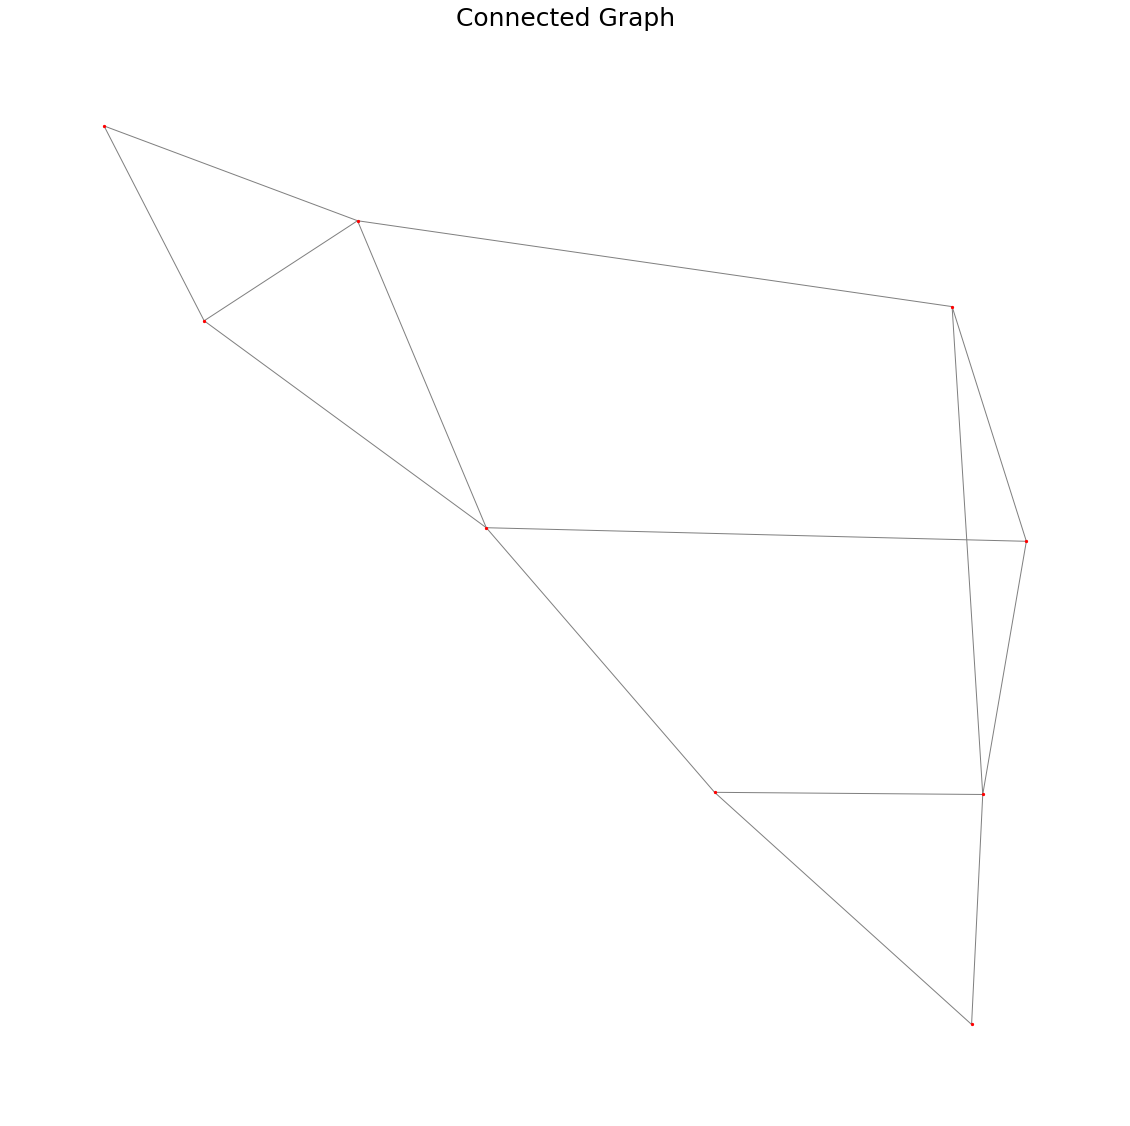

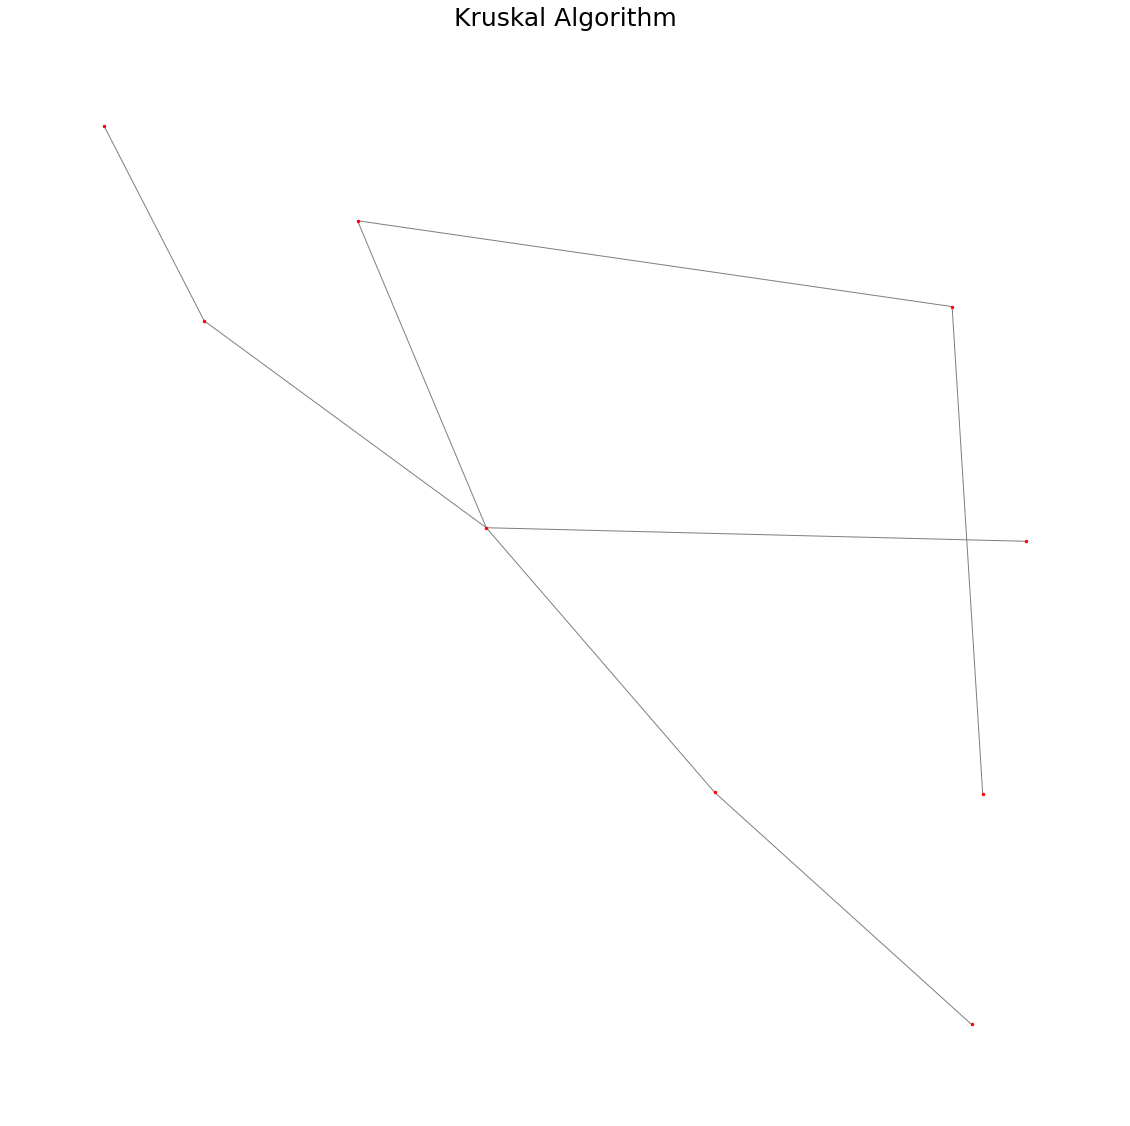

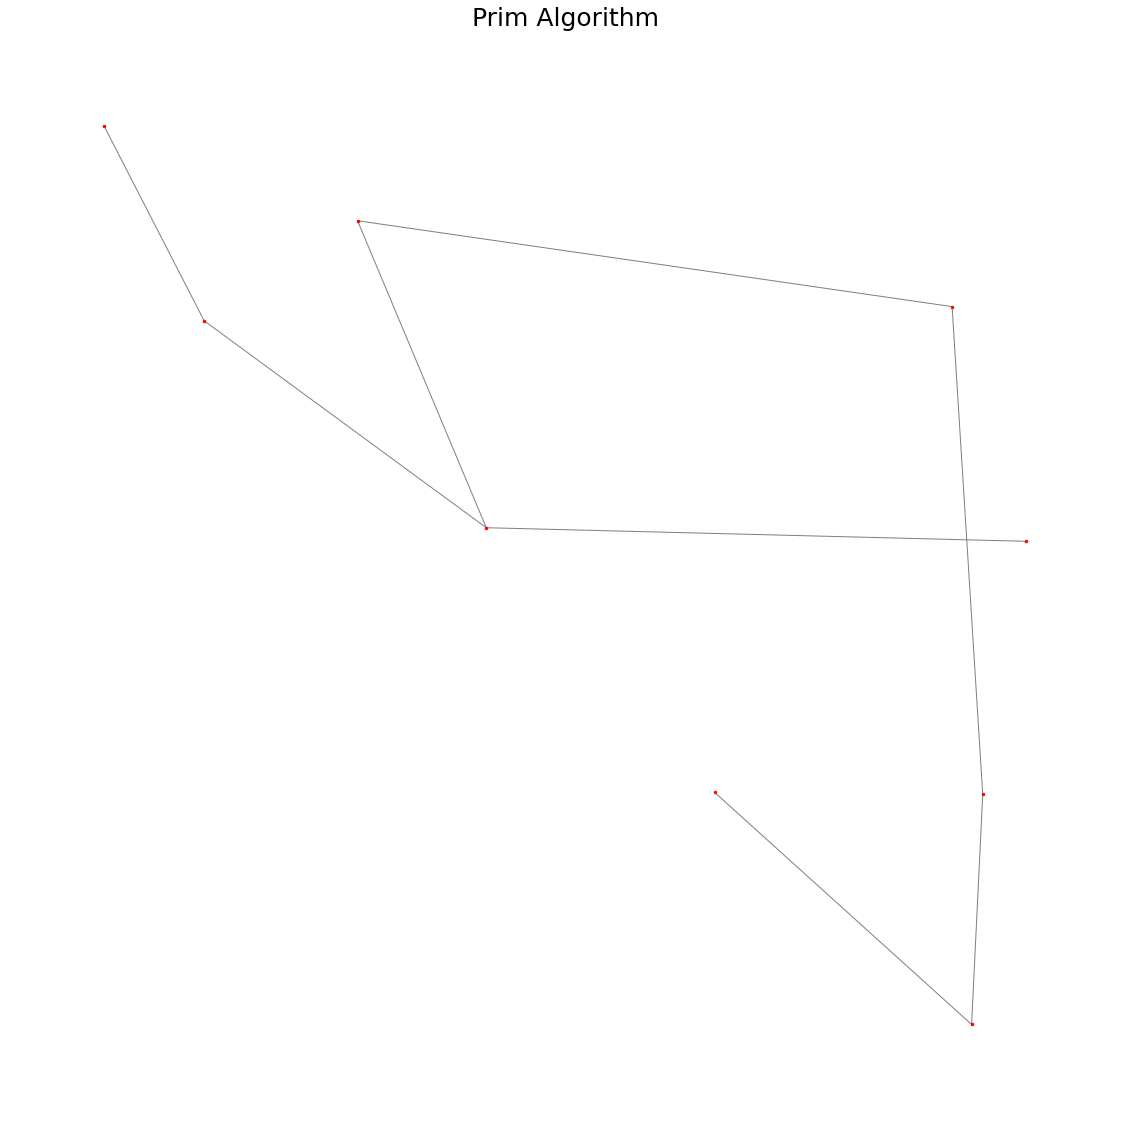

In [15]:
# Prepare and Visualisate results for from Karmen book

karmen_graph = Graph(9)
karm_list = []
karm_list.append([0, 1, 4])
karm_list.append([1, 2, 8])
karm_list.append([2, 3, 7])
karm_list.append([3, 4, 9])
karm_list.append([4, 5, 10])
karm_list.append([5, 6, 2])
karm_list.append([6, 7, 1])
karm_list.append([7, 8, 7])
karm_list.append([7, 0, 8])
karm_list.append([7, 1, 11])
karm_list.append([8, 2, 2])
karm_list.append([8, 6, 6])
karm_list.append([5, 2, 4])
karm_list.append([5, 3, 14])

g_mat = np.zeros((9, 9))

for karm_item in karm_list:
    weight = karm_item[2]
    g_mat[karm_item[0], karm_item[1]] = weight
    g_mat[karm_item[1], karm_item[0]] = weight
    karmen_graph.addEdge(*karm_item)

print(g_mat)

G = nx.from_numpy_matrix(g_mat)

    

krus_res = karmen_graph.KruskalAlgorithm()
print(krus_res)
krus_len = 0
for edge in krus_res:
    krus_len += edge[2]
print("Kruskal Algorith MST edges number:", len(krus_res), "  total weight:",  krus_len)

prim_res = karmen_graph.PrimsAlgorithm()
print(prim_res)
prim_len = 0
for edge in prim_res:
    prim_len += edge[2]
print("Prims Algorith MST edges number:", len(prim_res), "  total weight:",  prim_len)

visualisate_results(krus_res, prim_res, G)
    